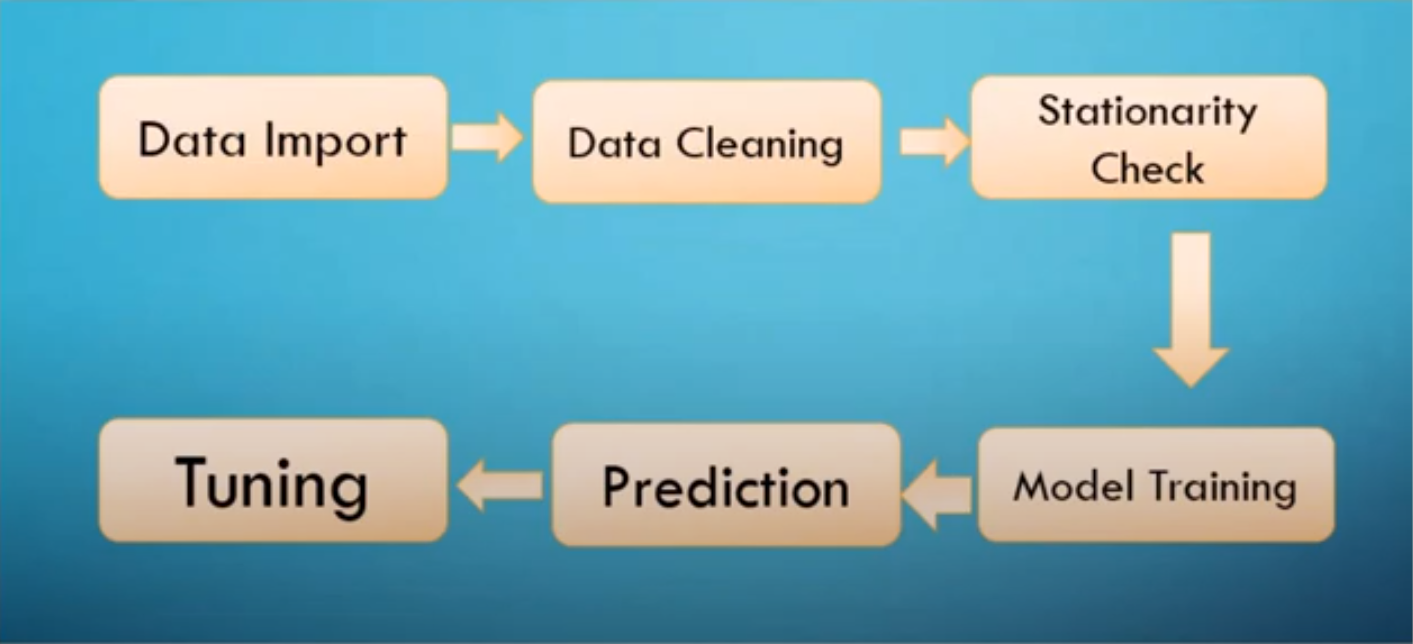

In [1]:
from IPython.display import Image
Image(r"D:\01_DATA_SCIENCE_FINAL\D-00000-TIMESERIES\D-TIMESERIES_CODES\Amn_TimeSeies\AMAN-Time Series Analysis\EndtoendTS_Analysis.PNG", height=1200, width=1200)

In [2]:
#Data and package import
#Data source - kaggle - https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA  

import itertools

TempData = pd.read_csv("GlobalLandTemperaturesByCity.csv")
TempData.head(30)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
9,1744-08-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [3]:
#Data Cleaning
TempData = TempData.dropna()
df_Denmark = TempData[TempData.Country == 'Denmark']

df_Denmark.index = pd.to_datetime(df_Denmark.dt)

df_Denmark = df_Denmark.drop(['dt', 'AverageTemperatureUncertainty'], axis=1)
df_Denmark.describe()

,AverageTemperature
count,12664.000000
mean,7.802640
std,6.648288
min,-7.816000
25%,2.084000
50%,7.200000
75%,14.190500
max,21.437000


In [4]:
ts = df_Denmark['AverageTemperature']
ts

dt
1743-11-01     6.068
1744-04-01     5.788
1744-05-01    10.644
1744-06-01    14.051
1744-07-01    16.082
               ...  
2013-04-01     6.026
2013-05-01    12.774
2013-06-01    15.685
2013-07-01    18.735
2013-08-01    18.067
Name: AverageTemperature, Length: 12664, dtype: float64

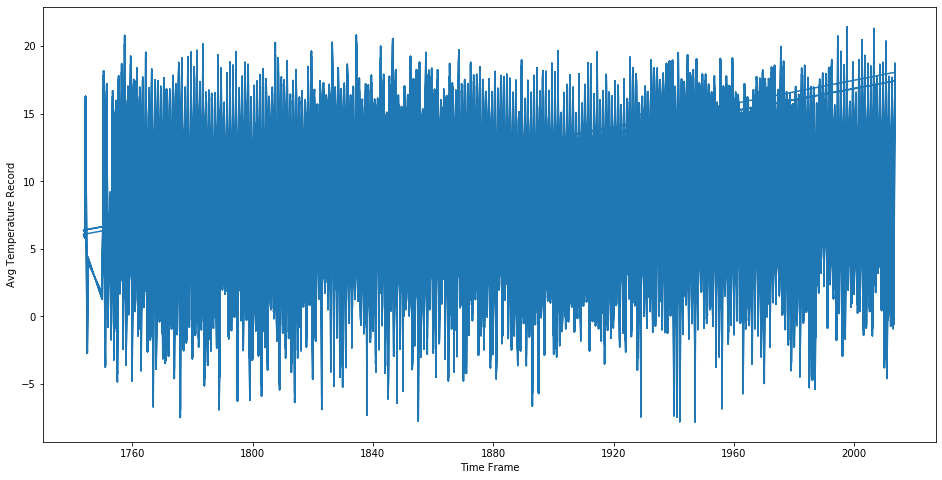

In [5]:
#Data Exploration
plt.figure(figsize=(16,8))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Avg Temperature Record')
ax1.plot(ts)
plt.show()

In [6]:
from statsmodels.tsa.stattools import adfuller

# ADF Test - nul hypothesis - non-stationary - if p-value < 5% reject null hypothesis
adfuller_result = adfuller(ts, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


ADF Statistic: -14.76443039180057
p-value: 2.3746970456362556e-27
Critial Values:
   1%, -3.430868192869495
Critial Values:
   5%, -2.86176901566292
Critial Values:
   10%, -2.566891900059256


In [7]:
#First model
newmodel = ARMA(ts, order=(1,1))
results = newmodel.fit()

C:\Users\VK\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\VK\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but 

In [8]:
ts.index.dtype

dtype('<M8[ns]')

In [9]:
prdeictions = results.predict('01/01/1990','01/01/1991')

```
C:\Users\VK\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\VK\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\VK\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
```

In [10]:
actuals = df_Denmark['01/01/1990':'01/01/1991']['AverageTemperature'][0:13]
# actuals = df_Denmark['01-01-1990':'01-01-1991']['AverageTemperature'][0:13]
# actuals = df_Denmark['1990-01-01':'199101-01']['AverageTemperature'][0:13]

AssertionError: <class 'numpy.ndarray'>

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals[0:13], prdeictions)
print("MAE %f"%mae)

In [ ]:
import itertools
i = j = range(0, 4)
ij = itertools.product(i,j)
for parameters in ij:
    try:
        mod = ARMA(ts, order=parameters)
        results = mod.fit()
        print('ARMA{} - AIC:{}',format(parameters, results.aic))
    except:
        continue

In [ ]:
prdeictions = results.predict('01/01/1990','01/01/1991')

In [11]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals[0:13], prdeictions)
print("MAE %f"%mae)

NameError: name 'actuals' is not defined

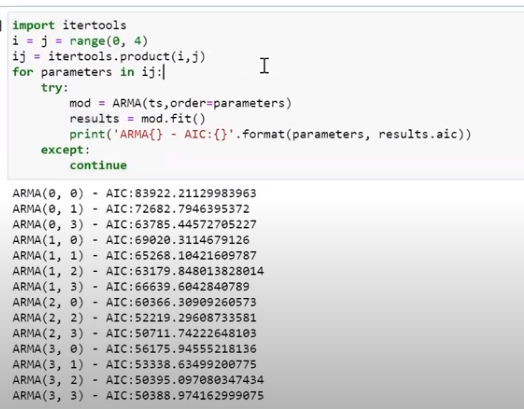

In [11]:
Image("p d q -values-evaluation.PNG")

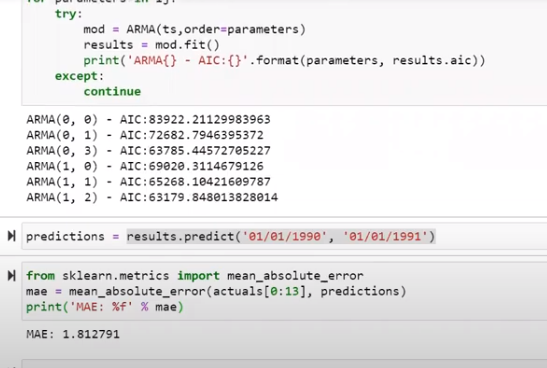

In [12]:
Image("performance_matrix.PNG")